# 신경망 생성
- `torch.nn` 패키지 사용

- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함

- 파이토치에서 신경망 생성을 위한 기본 틀

      1. class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      2. class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()

- `conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

        

## 신경망 정의

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [58]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# 선형회귀(Linear Regression) 모델 생성
- 코드 출처 : https://yceffort.kr/2019/02/19/pytorch-02-linear-regression/

## modules import

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

C:\Users\user\AppData\Local\Temp\ipykernel_14748\3143011814.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## 데이터 생성 및 회귀식 설정

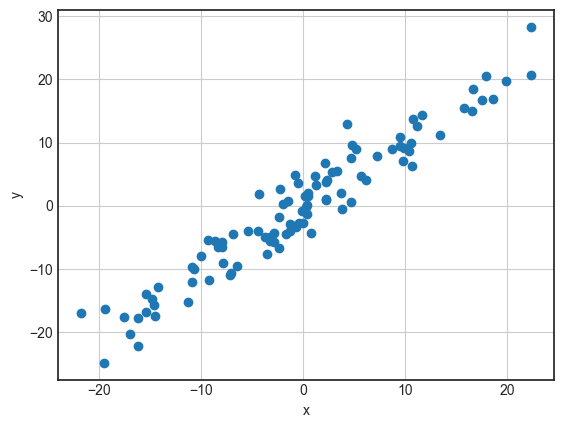

In [60]:
X = torch.randn(100, 1)*10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

## 신경망 구성

In [61]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        pred = self.linear(x)
        return pred

## 모델 생성 및 파라미터 확인

In [62]:
torch.manual_seed(111)

model = LinearRegressionModel()
print(model)

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [63]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


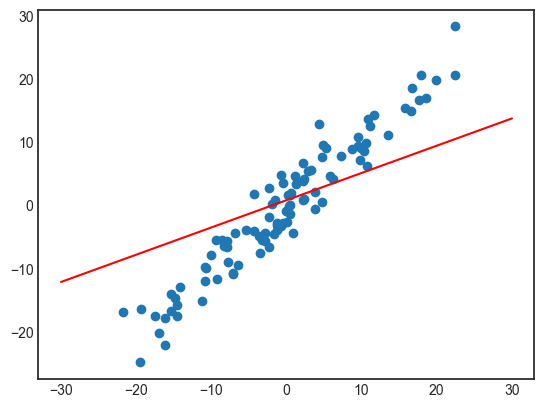

In [64]:
w, b = model.parameters()

def get_params():
    return w[0][0].item(), b[0].item()

def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

plot_fit('Initial Model')

## 손실함수와 옵티마이저

In [65]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 모델 학습

In [66]:
epochs = 100
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X)
    loss = criterion(y_pred, y)
    losses.append(loss.item())
    loss.backward()

    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch : {:3d}\tloss : {:.4f}'.format(epoch+1, loss))

Epoch :   1	loss : 44.3919
Epoch :  11	loss : 9.1550
Epoch :  21	loss : 8.7126
Epoch :  31	loss : 8.6847
Epoch :  41	loss : 8.6626
Epoch :  51	loss : 8.6415
Epoch :  61	loss : 8.6212
Epoch :  71	loss : 8.6017
Epoch :  81	loss : 8.5829
Epoch :  91	loss : 8.5649


In [67]:
losses

[44.3918571472168,
 31.63016128540039,
 23.436838150024414,
 18.17620277404785,
 14.798223495483398,
 12.628829002380371,
 11.235296249389648,
 10.339832305908203,
 9.764115333557129,
 9.393657684326172,
 9.154976844787598,
 9.000889778137207,
 8.901114463806152,
 8.836207389831543,
 8.793686866760254,
 8.765541076660156,
 8.746626853942871,
 8.733643531799316,
 8.724468231201172,
 8.717742919921875,
 8.712594032287598,
 8.708459854125977,
 8.704978942871094,
 8.701922416687012,
 8.699141502380371,
 8.696540832519531,
 8.694058418273926,
 8.691654205322266,
 8.68930435180664,
 8.686995506286621,
 8.684711456298828,
 8.682448387145996,
 8.680203437805176,
 8.677971839904785,
 8.675751686096191,
 8.673542022705078,
 8.671344757080078,
 8.66915512084961,
 8.666975021362305,
 8.664804458618164,
 8.662642478942871,
 8.66048812866211,
 8.658343315124512,
 8.656208038330078,
 8.654080390930176,
 8.651963233947754,
 8.64985179901123,
 8.647749900817871,
 8.64565658569336,
 8.643568992614746,
 

## 시각화

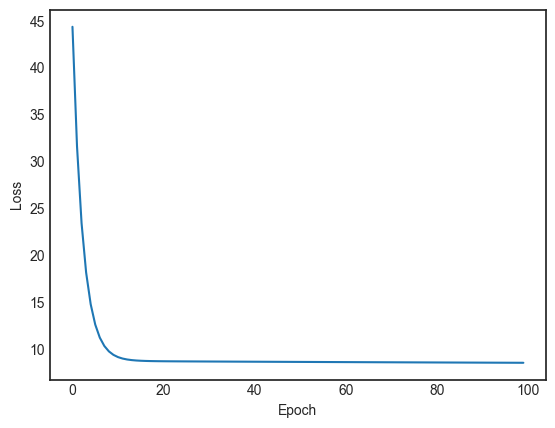

In [68]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

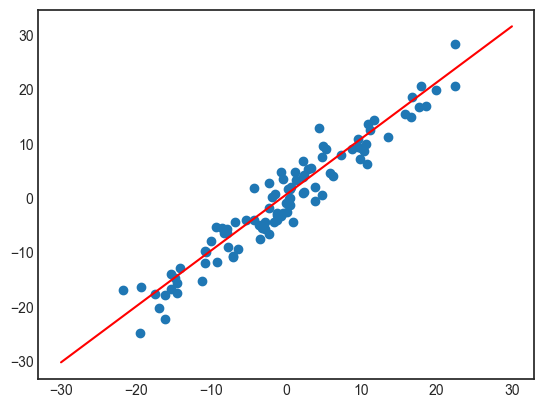

In [69]:
plot_fit('Trained Model')